In [0]:
!pip install node2vec

In [0]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("film.csv", nrows=100)
#sutradara
g = nx.from_pandas_edgelist(df, source='labelFilm', target='labelDirector') 
#pemain
df2= df[['labelFilm', 'labelStarring']].dropna(axis = 0, how ='any')
mylist = df2.values.tolist()
g.add_edges_from(mylist)

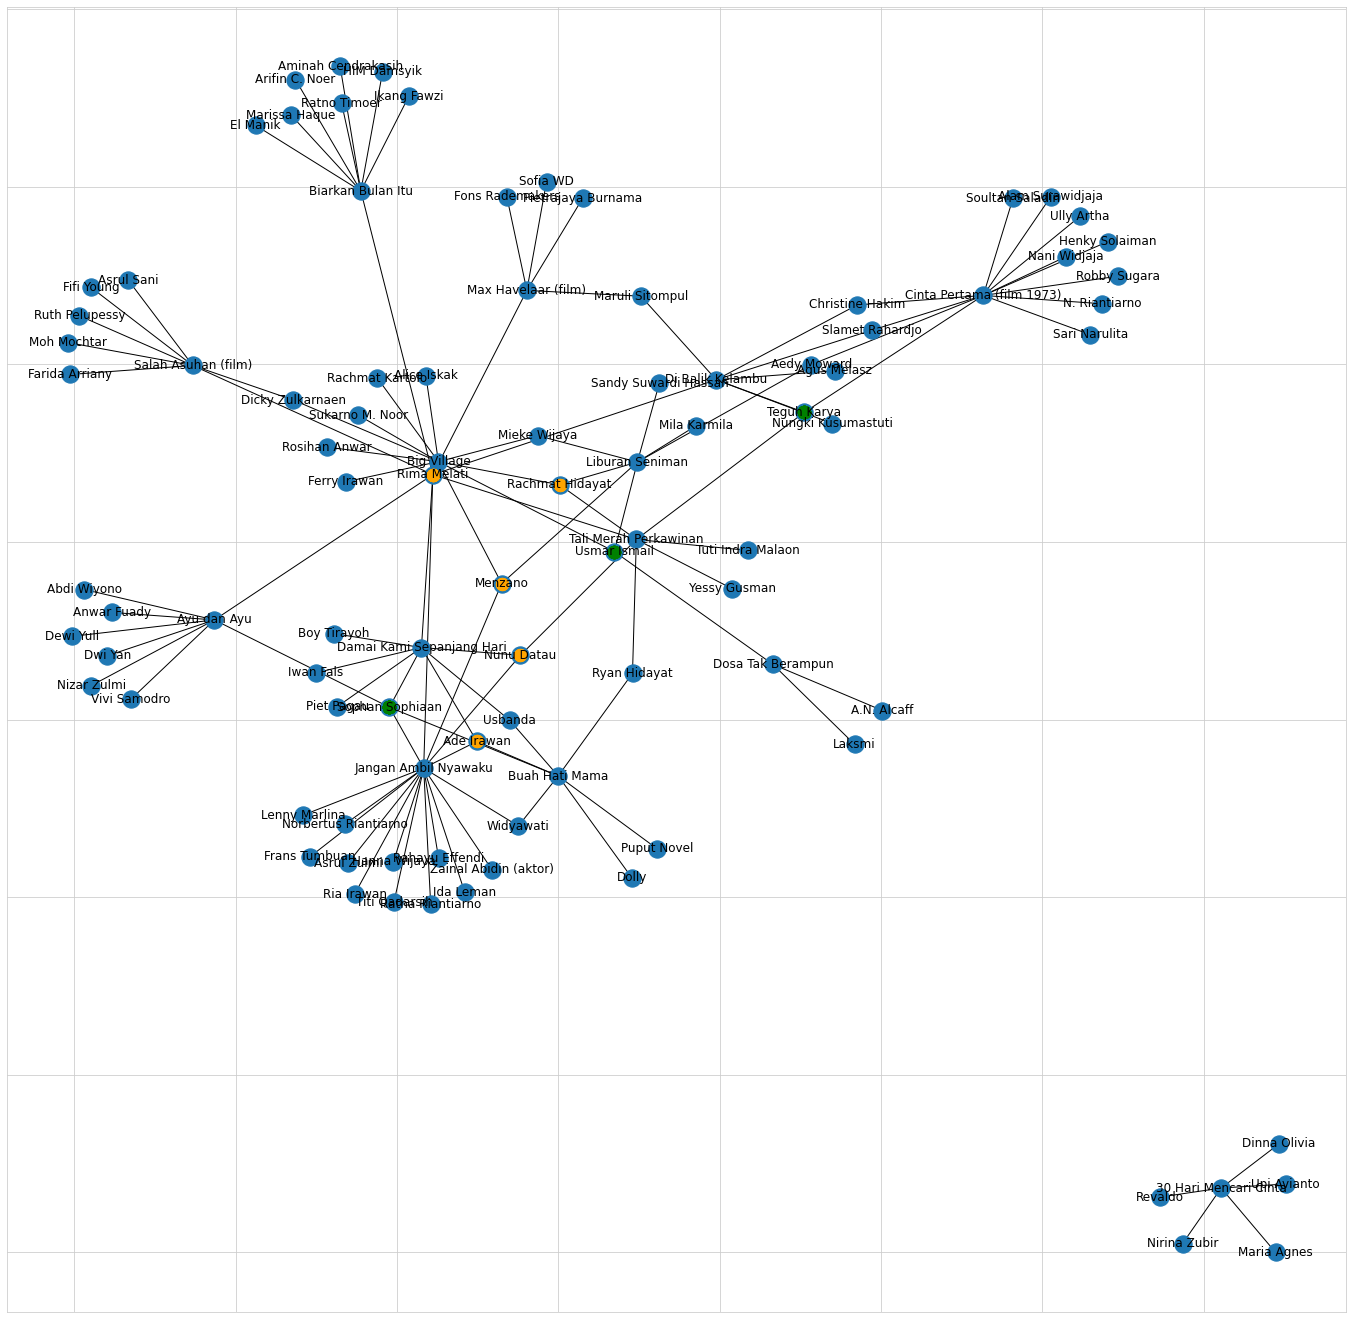

In [0]:
sns.set_style('whitegrid')
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
fig, ax = plt.subplots(figsize=(24,24))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True)
nx.draw_networkx_edges(g, layout,  ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)

pemainpopuler = [pemain for pemain in df.labelStarring if g.degree(pemain) > 2]
nx.draw_networkx_nodes(g, layout, nodelist=pemainpopuler, node_color='orange', node_size=150)

sutradaraPopuler = [sutradara for sutradara in df.labelDirector if g.degree(sutradara) > 2]
nx.draw_networkx_nodes(g, layout, nodelist=sutradaraPopuler, node_color='green',node_size=150)


In [0]:
node2vec = Node2Vec(g, dimensions=20, walk_length=16, num_walks=100, workers=2)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities: 100%|██████████| 94/94 [00:00<00:00, 3141.90it/s]


In [0]:
#embedding starring saja
nodefilm = [x for x in df.labelStarring]
embeddings = np.array([model.wv[x] for x in nodefilm])
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [0]:
from matplotlib import colors as mcolors

In [0]:
from itertools import cycle

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
print(colors)
cycol = cycle(colors)

{'b': (0, 0, 1), 'g': (0, 0.5, 0), 'r': (1, 0, 0), 'c': (0, 0.75, 0.75), 'm': (0.75, 0, 0.75), 'y': (0.75, 0.75, 0), 'k': (0, 0, 0), 'w': (1, 1, 1), 'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B

In [0]:
warna_pemain = {}
for item in df['labelStarring']:
  lists = {item : next(cycol)}
  warna_pemain.update(lists)
print(warna_pemain)

{'El Manik': 'b', 'HIM Damsyik': 'g', 'Rima Melati': 'lightskyblue', 'Marissa Haque': 'c', 'Aminah Cendrakasih': 'm', 'Ikang Fawzi': 'y', 'Ratno Timoer': 'k', 'Dicky Zulkarnaen': 'lightpink', 'Fifi Young': 'aliceblue', 'Ruth Pelupessy': 'aqua', 'Farida Arriany': 'aquamarine', 'Moh Mochtar': 'azure', 'Maruli Sitompul': 'ivory', 'Sofia WD': 'black', 'Pietrajaya Burnama': 'blanchedalmond', 'Iwan Fals': 'blue', 'Sophan Sophiaan': 'deeppink', 'Nunu Datau': 'lightblue', 'Ade Irawan': 'dimgrey', 'Piet Pagau': 'chartreuse', 'Boy Tirayoh': 'chocolate', 'Usbanda': 'firebrick', 'Dewi Yull': 'cornflowerblue', 'Anwar Fuady': 'crimson', 'Abdi Wiyono': 'cyan', 'Dwi Yan': 'darkblue', 'Vivi Samodro': 'darkcyan', 'Nizar Zulmi': 'darkgoldenrod', 'Frans Tumbuan': 'darkgray', 'Norbertus Riantiarno': 'darkgreen', 'Widyawati': 'deepskyblue', 'Ida Leman': 'darkmagenta', 'Ria Irawan': 'darkolivegreen', 'Ratna Riantiarno': 'darkorange', 'Lenny Marlina': 'darkorchid', 'Rahayu Effendi': 'darksalmon', 'Zainal Abid

In [0]:
warna_sutradara = {}
for item in df['labelDirector']:
  lists = {item : next(cycol)}
  warna_sutradara.update(lists)
df['color'] = df['labelDirector'].apply(lambda x: warna_sutradara[x])
warna_film= dict(zip(df['labelFilm'], df['color']))
colors = [warna_film[x] for x in df.labelFilm]

In [0]:
warna_sutradara = {
    'Arifin C. Noer': 'b', 
    'Asrul Sani': 'c', 
    'Fons Rademakers': 'm', 
    'Sophan Sophiaan': 'y', 
    'Teguh Karya': 'orange', 
    'Upi Avianto': 'lightblue', 
    'Usmar Ismail': 'pink'
    }
df['color'] = df['labelDirector'].apply(lambda x: warna_sutradara[x])
warna_film= dict(zip(df['labelFilm'], df['color']))
colors = [warna_film[x] for x in df.labelFilm]

In [0]:
warna_pemain = {}
for item in df['labelFilm']:
  lists = {item : next(cycol)}
  warna_pemain.update(lists)
df['color'] = df['labelFilm'].apply(lambda x: warna_pemain[x])
warna_film= dict(zip(df['labelFilm'], df['color']))
colors = [warna_film[x] for x in df.labelFilm]

In [0]:
import matplotlib.patches as mpatches

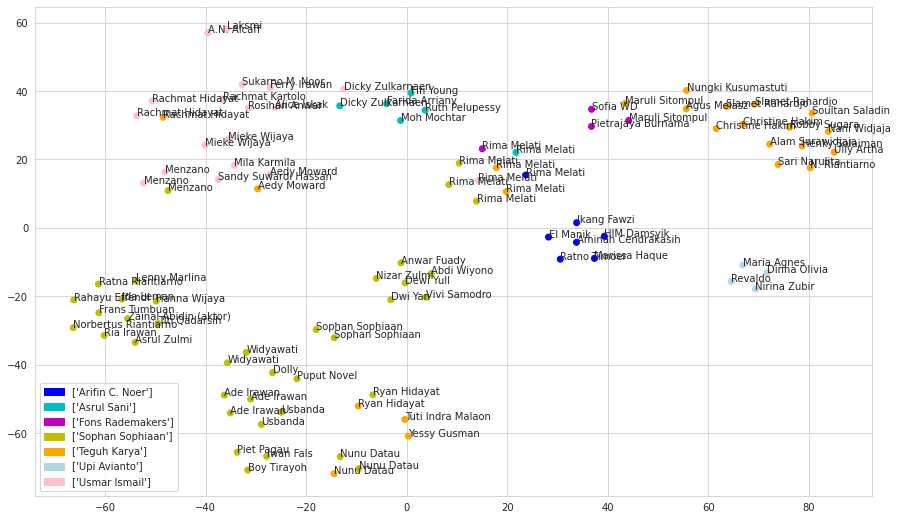

In [0]:
figure = plt.figure(figsize=(15, 9))
ax = figure.add_subplot(111)
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
i=0
for filmku in nodefilm:
  ax.annotate(filmku, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
  i=i+1
sutradara_legend = [mpatches.Patch(color=color, label=df.labelDirector.unique()) 
for df.labelDirector, color in warna_sutradara.items()]
ax.legend(handles=sutradara_legend);

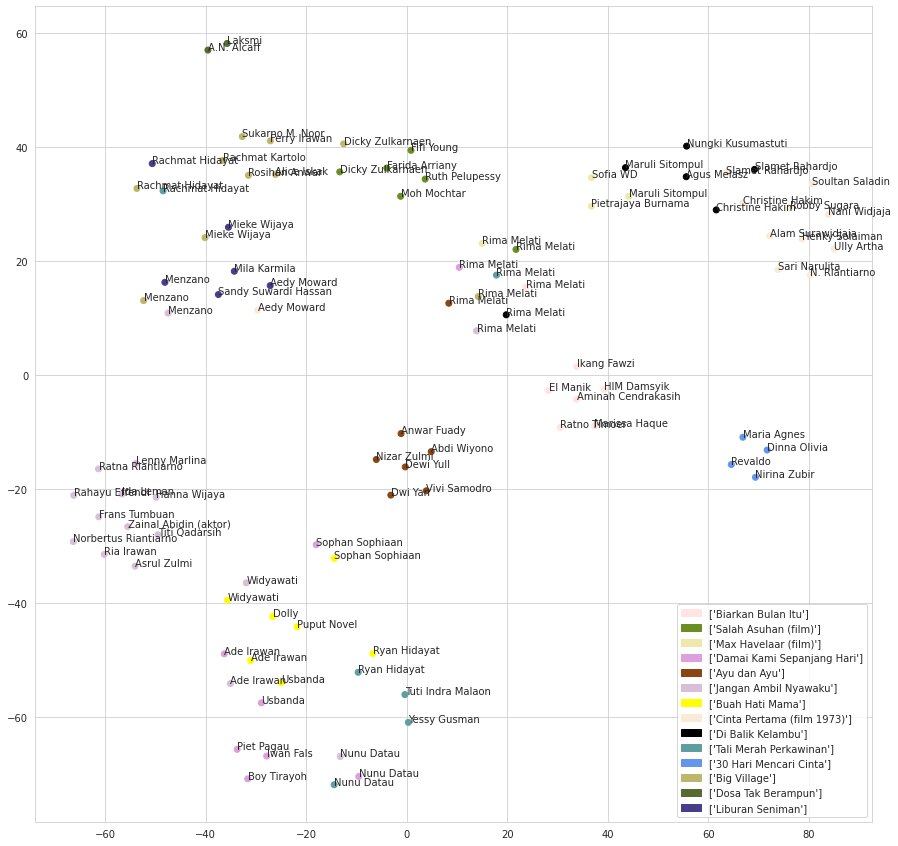

In [0]:
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
i=0
for filmku in nodefilm:
  ax.annotate(filmku, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
  i=i+1
pemain_legend = [mpatches.Patch(color=color, label=df.labelStarring.unique()) 
for df.labelStarring, color in warna_pemain.items()]
ax.legend(handles=pemain_legend);

In [0]:
density = nx.density(g)
degree_dict = dict(g.degree(g.nodes()))

(-0.5776766668816121,
 1.075127460327696,
 -0.5461716869454611,
 0.7205598846186846)

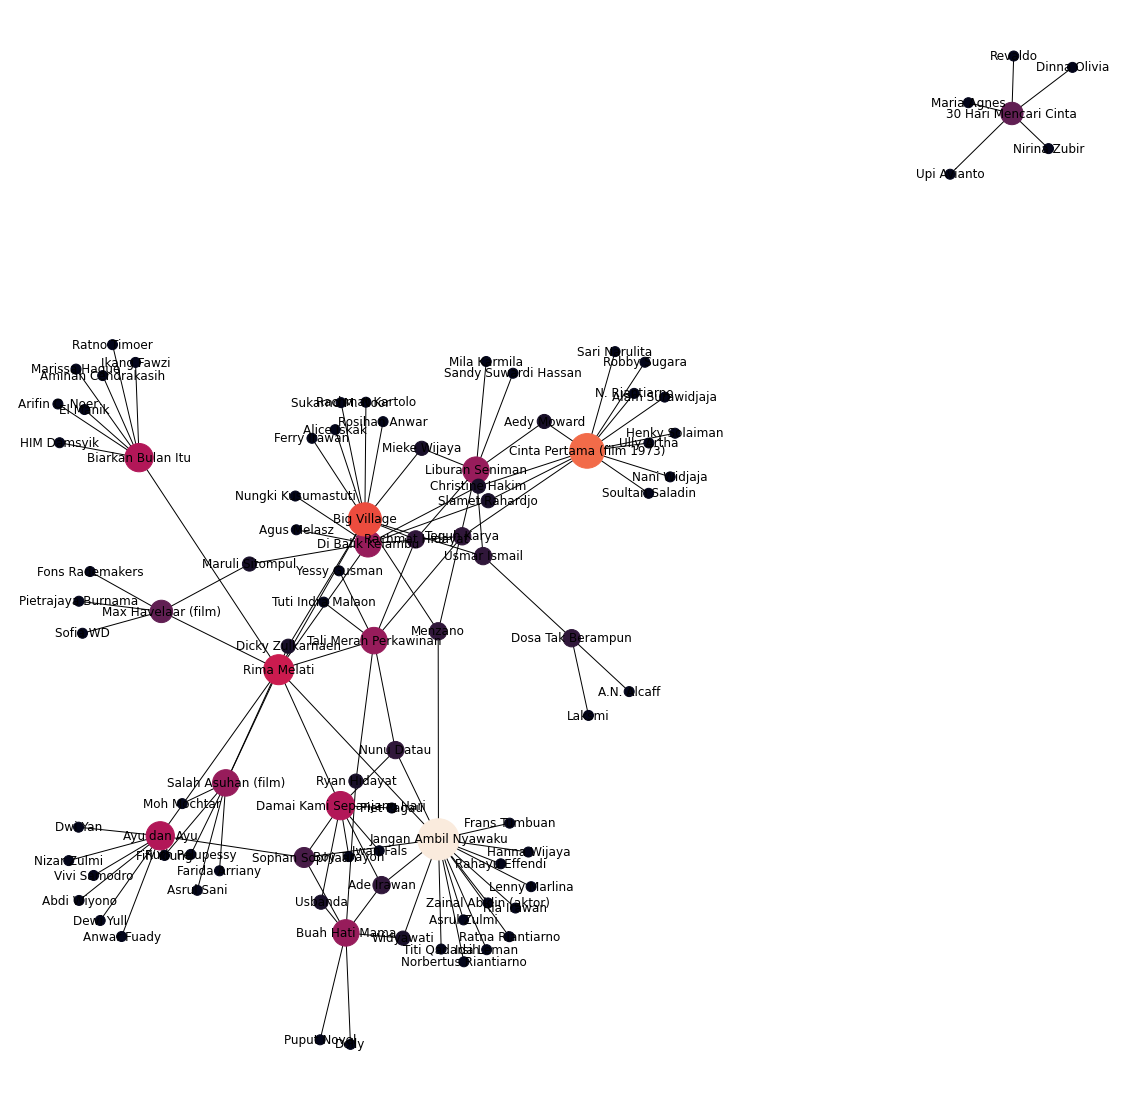

In [0]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 100 for v in degree_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,node_color=node_color,node_size=node_size )
plt.axis('off')